# Gradient Descent Implementations 

In [128]:
import numpy as np
import pandas as pd
import math
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [150]:
d = 100 #cantidad de columnas para el dataset.
n = 1000 #cantidad de observaciones para el dataset.
X = np.random.normal(0,1, size=(n,d))
beta_true = np.random.normal(0,1, size=(d,1))
y = X.dot(beta_true) + np.random.normal(0,0.5,size=(n,1))

# Part 1: Analytic Solution

The Analytic Solution for a multivariable linear model is expressed below. This will be used as benchmark on the implementations of the gradient descent variants.

In [151]:
B = np.matmul(np.matmul(LA.inv(np.matmul(np.transpose(X),X)),np.transpose(X)),y)
y_train = X.dot(B)

## Part 2: Gradient Descent

In [153]:
B_0 = np.zeros(X.shape[1])
B_0 = B_0.reshape(B_0.shape[0],1)
B_0.shape

(100, 1)

## Batch Gradient Descent 

In [154]:
def batch_gradient_descent(x_train,y_train,B,it_limit,tolerance,lr):
    i=0
    method = 'batch_gd'
    batch_size = len(x_train)
    df = pd.DataFrame(columns=['method','i','error','lr','batch_size'])
    error = np.sum((np.matmul(x_train,B) - y_train)**2)
    while error > tolerance and i < it_limit:
        gradient = np.matmul(np.matmul(B.T,x_train.T)-y_train.T,x_train)
        B = B - lr/x_train.shape[1]*gradient.T
        error = np.sum((np.matmul(x_train,B) - y_train)**2)
        run = {'method':method,'i':i, 'error':error,'lr':lr,'batch_size':batch_size}
        df = df.append(run, ignore_index=True)

        i+=1
    
    return df

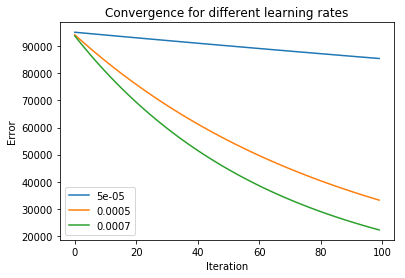

In [155]:
log_bgd = pd.DataFrame(columns=['method','i','error','lr','batch_size'])
lrs = [0.00005, 0.0005,0.0007]
for learning_rate in lrs:
    results = batch_gradient_descent(X,y,B_0,100,100,learning_rate)
    log_bgd = log_bgd.append(results[-1:],ignore_index = True)
    plt.plot(results['i'],results['error'])
    plt.title("Convergence for different learning rates")
    plt.xlabel("Iteration")
    plt.ylabel("Error")

plt.legend(lrs)
plt.show()

We can see that a learning rate of 0.00005 behaves linearly. Thus, it takes a lot of iterations to converge to a small error. A learning rate of 0.0005 behaves better, but 0.0007 presents the fastest convergences of all three, behaving almost quadratically.

In [156]:
log_bgd

,method,i,error,lr,batch_size
0,batch_gd,99,85507.118341,0.00005,1000
1,batch_gd,99,33208.607796,0.00050,1000
2,batch_gd,99,22208.751974,0.00070,1000


In [157]:
def stochastic_gradient_descent(x_train,y_train,B,it_limit,tolerance,lr):
    df = pd.DataFrame(columns=['method','i','error','lr','batch_size'])
    method = 'sgd'
    batch_size = 1
    for i in range(it_limit):
        total_error = 0
        for j in range(x_train.shape[0]):
            obs = int(np.random.randint(x_train.shape[0], size=1))
            X = x_train[obs,:].reshape(1,x_train.shape[1])
            Y = y_train[obs].reshape(1,1)
            gradient = 2*(np.matmul(X.T, np.matmul(X, B) - Y)) 

            B = B - lr*gradient
            error = np.sum((np.matmul(X,B) - Y)**2)
            total_error+=error
            
        run = {'method':method,'i':i, 'error':total_error,'lr':lr, 'batch_size':batch_size}
        df = df.append(run, ignore_index=True)

    
   
    return df

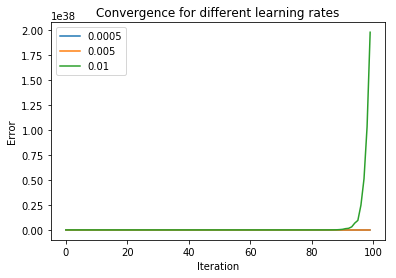

In [158]:
log_sgd = pd.DataFrame(columns=['method','i','error','lr','batch_size'])
lrs = [0.0005, 0.005,0.01]
for learning_rate in lrs:
    results = stochastic_gradient_descent(X,y,B_0,100,100,learning_rate)
    log_sgd = log_sgd.append(results[-1:],ignore_index = True)
    plt.plot(results['i'],results['error'])
    plt.title("Convergence for different learning rates")
    plt.xlabel("Iteration")
    plt.ylabel("Error")


plt.legend(lrs)
plt.show()

We can observe that all learning rates for stochastic gradient descent give a very large error for each iteration, the implementation of these learning rates is not optimal. For comparison purposes, we will use the same learning rates employed in batch gradient descent: 

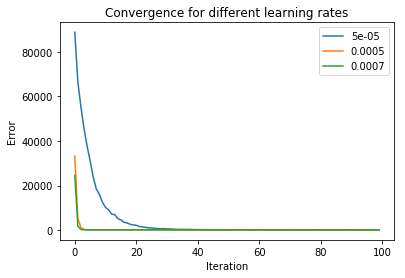

In [159]:
log_sgd = pd.DataFrame(columns=['method','i','error','lr','batch_size'])
lrs = [0.00005, 0.0005,0.0007]
for learning_rate in lrs:
    results = stochastic_gradient_descent(X,y,B_0,100,100,learning_rate)
    log_sgd = log_sgd.append(results[-1:],ignore_index = True)
    plt.plot(results['i'],results['error'])
    plt.title("Convergence for different learning rates")
    plt.xlabel("Iteration")
    plt.ylabel("Error")


plt.legend(lrs)
plt.show()

In [160]:
log_sgd

,method,i,error,lr,batch_size
0,sgd,99,224.217988,0.00005,1
1,sgd,99,185.009562,0.00050,1
2,sgd,99,177.428530,0.00070,1


As we can see, this learning rates show a better behavior than the ones first proposed. A learning rate of 0.0007 shows to have the best error iteration.

However, employing this method took a lot of time compared to batch gradient descent, so it is computionally expensive. 

# Mini Batch Gradient Descent

In [140]:
def mini_batch_gradient_descent(x_train,y_train,B,it_limit,tolerance,lr,batch_size):
    df = pd.DataFrame(columns=['method','i','error','lr','batch_size'])
    method = 'mini_batch_gd'
    n = x_train.shape[0]
    num_batches = int(n/batch_size)
    
    for i in range(it_limit):
        total_error = 0
        for j in range(num_batches):
            obs = np.random.randint(x_train.shape[0], size=batch_size)
            X = x_train[obs]
            Y = y_train[obs]
            gradient = 2*(np.matmul(X.T, np.matmul(X, B) - Y)) 

            B = B - lr*gradient
            error = np.sum((np.matmul(X,B) - Y)**2)
            total_error+=error
            #print("iteracion: ",i,"batch : ",j, "error :",error)
        run = {'method':method,'i':i, 'error':total_error,'lr':lr,'batch_size':batch_size}
        df = df.append(run, ignore_index=True)

    
   
    return df

In [141]:
mini_batch_gradient_descent(X,y,B_0,it_limit=100,tolerance=100,lr=0.001,batch_size=100)

,method,i,error,lr,batch_size
0,mini_batch_gd,0,13998.190809,0.001,100
1,mini_batch_gd,1,725.764442,0.001,100
2,mini_batch_gd,2,208.076558,0.001,100
3,mini_batch_gd,3,179.306955,0.001,100
4,mini_batch_gd,4,159.497185,0.001,100
5,mini_batch_gd,5,173.607031,0.001,100
6,mini_batch_gd,6,165.395512,0.001,100
7,mini_batch_gd,7,166.154894,0.001,100
8,mini_batch_gd,8,159.800053,0.001,100
9,mini_batch_gd,9,167.352804,0.001,100


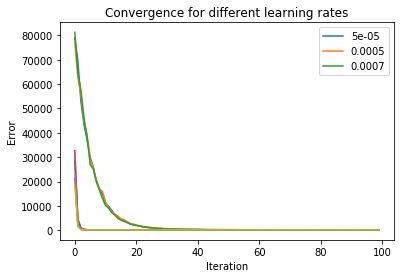

In [163]:
log_mbgd = pd.DataFrame(columns=['method','i','error','lr','batch_size'])
lrs = [0.00005, 0.0005,0.0007]
batch_size = [25,50,100]
for learning_rate in lrs:
    for batch in batch_size:
        results = mini_batch_gradient_descent(X,y,B_0,it_limit=100,tolerance=100,lr=learning_rate,batch_size=batch)
        log_mbgd = log_mbgd.append(results[-1:],ignore_index = True)
        plt.plot(results['i'],results['error'])
        plt.title("Convergence for different learning rates")
        plt.xlabel("Iteration")
        plt.ylabel("Error")

plt.legend(lrs)
plt.show()

In [164]:
log_mbgd

,method,i,error,lr,batch_size
0,mini_batch_gd,99,207.261577,0.00005,25
1,mini_batch_gd,99,220.317414,0.00005,50
2,mini_batch_gd,99,221.883608,0.00005,100
3,mini_batch_gd,99,196.934774,0.00050,25
4,mini_batch_gd,99,175.905050,0.00050,50
5,mini_batch_gd,99,183.302932,0.00050,100
6,mini_batch_gd,99,158.828888,0.00070,25
7,mini_batch_gd,99,175.134646,0.00070,50
8,mini_batch_gd,99,168.210909,0.00070,100


For minibatch gradient descent we employed all several combinations of batch size and learning rate. All of them performed well. Nevertheless, a minibatch of size 25 and a learning rate of 0.0007 returned the lowest error of all. This result is interesting, as it is the combination of **the highest learning rate and the smallest batch size**.

In [165]:
log = pd.DataFrame(columns=['method','i','error','lr'])
log = log.append([log_sgd,log_mbgd,log_bgd],ignore_index=True)

C:\Users\jctep\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [166]:
log.sort_values(by='error')

,batch_size,error,i,lr,method
9,25,158.828888,99,0.00070,mini_batch_gd
11,100,168.210909,99,0.00070,mini_batch_gd
10,50,175.134646,99,0.00070,mini_batch_gd
7,50,175.905050,99,0.00050,mini_batch_gd
2,1,177.428530,99,0.00070,sgd
8,100,183.302932,99,0.00050,mini_batch_gd
1,1,185.009562,99,0.00050,sgd
6,25,196.934774,99,0.00050,mini_batch_gd
3,25,207.261577,99,0.00005,mini_batch_gd
4,50,220.317414,99,0.00005,mini_batch_gd


In [146]:
analytic_sol_error = np.sum((y_train - y))**2
analytic_sol_error

53.943706027571544

## Conclusions and comments: 

### comparison of models 

Batch Gradient Descent, Minibatch gradient descent and stochastic gradient descent algorithms where implemented. The restrictions for comparing the models involved a maximum of 100 iterations and the employment of the sames step sizes (learning rates).
Batch gradient descent showed the highest error of all implementations. This error can be reduced by allowing more iterations.
Stochastic Gradient descent performed similar in some experiments to minibatch gradient descent. However, this took more time compared to the other ones.

Minibatch gradient descent was, on average, the best implementation. This could be due to the fact that minibatch gradient descent is right in the middle of the batch and stochastic gradient descent respectively. 

### analytic solution 

Compared to the analytic solution, all methods had higher error. Nevertheless, **this is because we implemented a restriction of iterations. If we remove this restriction, methods will converge to that error eventually.**

The analytic solution is not employed on practice. This is because doing this calculation requires a lot of computational power, as it calculates inverse matrixes and several dot products. Adding one more variable increases considerably the cost of performing such operations. 
